<a href="https://colab.research.google.com/github/shpnyc/CUNYRepo/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Susan Parker
#Python - Project 3 --December 21, 2025
#Development README--https://github.com/shpnyc/CUNYRepo/blob/main/README.md
#Jupyter Notebook located in colab environment. Uploaded to GitHub.
#Full annotations of Syntax errors with code executions.

##Load the CSV datafile into Pandas --Step One; mount my google drive to the Colab environment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
##Load the CSV datafile into Pandas --Step Two; Replace the path to my CSV file
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/diabetic_data.csv')

In [12]:
##Load the CSV datafile into Pandas --Step Three;
##View the data file using the heads analysis - determine selection criteria for analysis
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/diabetic_data.csv')
print(df.head())

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [13]:
##Summarise the Diabetic Data --Step Four; selection criteria - 'Diabetes Medication'
df = pd.read_csv('/content/drive/MyDrive/diabetic_data.csv')

print(df.groupby(["diabetesMed"]).count())

             encounter_id  patient_nbr   race  gender    age  weight  \
diabetesMed                                                            
No                  23403        23403  23403   23403  23403   23403   
Yes                 78363        78363  78363   78363  78363   78363   

             admission_type_id  discharge_disposition_id  admission_source_id  \
diabetesMed                                                                     
No                       23403                     23403                23403   
Yes                      78363                     78363                78363   

             time_in_hospital  ...  examide  citoglipton  insulin  \
diabetesMed                    ...                                  
No                      23403  ...    23403        23403    23403   
Yes                     78363  ...    78363        78363    78363   

             glyburide-metformin  glipizide-metformin  \
diabetesMed                                         

In [19]:
#data cleaning tasks to remove duplicates, get indexes and convert the data type to use best possible frame
df.duplicated(keep='last')

,0
0,False
1,False
2,False
3,False
4,False
...,...
101761,False
101762,False
101763,False
101764,False


In [21]:
df[df.duplicated(keep=False)].index

df.convert_dtypes()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


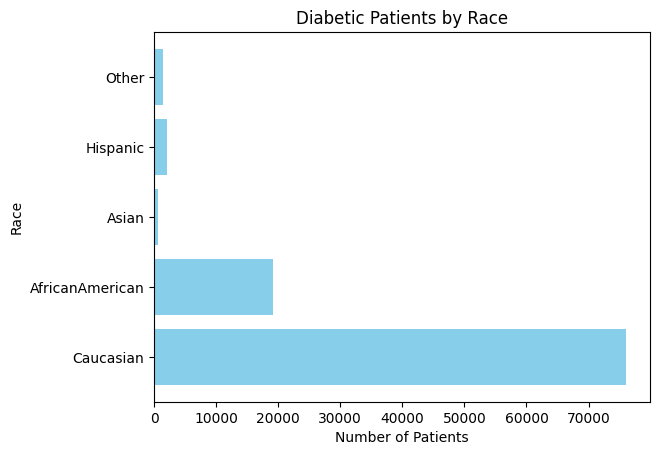

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure df is loaded from the previous steps, if not already in memory.
df = pd.read_csv('/content/drive/MyDrive/diabetic_data.csv')

race = ['Caucasian', 'AfricanAmerican', 'Asian', 'Hispanic', 'Other']

# Calculate counts for each race from the dataframe
race_counts = df['race'].value_counts().reindex(race, fill_value=0)

# Plotting the race distribution
plt.barh(race_counts.index, race_counts.values, color='skyblue')
plt.title('Diabetic Patients by Race')
plt.xlabel('Number of Patients')
plt.ylabel('Race')
plt.show()